In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 


In [ ]:
# Load the Iris dataset from a CSV file
df = pd.read_csv("C:/Users/prem/data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Separate features and target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [4]:
# Calculate mean, and standard deviation for standardize
mean_values = X.mean()
std_values = X.std()

print("Mean values:\n", mean_values)
print("Standard deviation values:\n", std_values)

Mean values:
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
Standard deviation values:
 sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64


In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [6]:
# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)

In [7]:

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [8]:
# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


In [9]:
# Project the data onto the principal components
X_pca = X_scaled.dot(sorted_eigenvectors[:, :2])


In [10]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y.values
pca_df.head()

,Principal Component 1,Principal Component 2,Target
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


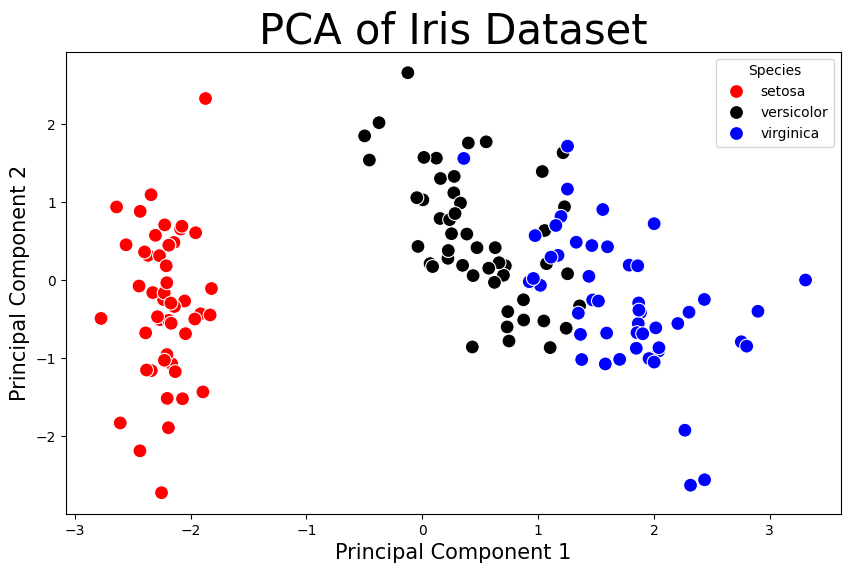

In [11]:
# Plot the PCA results using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='Target', palette=['red', 'black', 'blue'],s=100)
plt.xlabel('Principal Component 1',fontsize= 15)
plt.ylabel('Principal Component 2',fontsize= 15)
plt.title('PCA of Iris Dataset',fontsize= 30)
plt.legend(title='Species')
plt.show()